In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors,datasets
from sklearn.neural_network import MLPClassifier

In [36]:
np.random.seed(0)
iris = datasets.load_iris()
X = iris.data[:,0:2]
Y = iris.target
data = np.hstack((X,Y.reshape(Y.size,1)))
np.random.shuffle(data)
X = data[:,:-1]
Y = data[:,-1]
train_x = X[:-30]
test_x = X[-30:]
train_y = Y[:-30]
test_y = Y[-30:]

在给出测试函数之前先给出两个画图函数：

In [37]:
def plot_samples(ax,x,y):
    n_classes = 3
    plot_colors = "bry"
    for i,color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        ax.scatter(x[idx,0], x[idx,1], c = color,
                  label = iris.target_names[i], cmap=plt.cm.Paired)

In [38]:
def plot_classifier_predict_meshgrid(ax,clf,x_min,x_max,y_min,y_max):
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                        np.arange(y_min,y_max,plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx,yy,Z,cmap = plt.cm.Paired)

给出测试函数：

In [39]:
def mlpclassifier_iris():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    classifier = MLPClassifier(activation='logistic', max_iter = 10000,
                              hidden_layer_sizes=(30,))
    classifier.fit(train_x,train_y)
    train_score = classifier.score(train_x,train_y)
    test_score = classifier.score(test_x,test_y)
    x_min, x_max = train_x[:,0].min()-1, train_x[:,0].max()+2
    y_min, y_max = train_x[:,1].min()-1, train_x[:,1].max()+2
    
    plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
    plot_samples(ax,train_x,train_y)
    ax.legend(loc = "best")
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title("trian score:%f;test score:%f" %(train_score,test_score))
    plt.show()

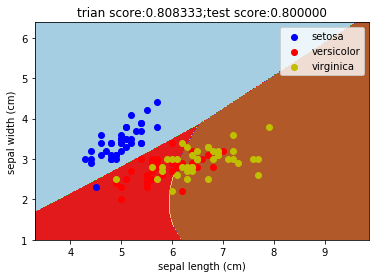

In [40]:
mlpclassifier_iris()

下面观察不同参数对分类器的影响，首先是**隐含层hidden-layers**:

In [41]:
def mlpclassifier_iris_hidden_layer_size():
    fig = plt.figure()
    hidden_layer_sizes = [(10,),(30,),(100,),(5,5),(10,10),(30,30)]
    for itx,size in enumerate(hidden_layer_sizes):
        ax = fig.add_subplot(2,3,itx+1)
        classifier = MLPClassifier(activation='logistic', max_iter = 10000,
                                  hidden_layer_sizes=size)
        classifier.fit(train_x,train_y)
        train_score = classifier.score(train_x,train_y)
        test_score = classifier.score(test_x,test_y)
        x_min, x_max = train_x[:,0].min()-1, train_x[:,0].max()+2
        y_min, y_max = train_x[:,1].min()-1, train_x[:,1].max()+2
    
        plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
        plot_samples(ax,train_x,train_y)
        ax.legend(loc = "best")
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("layer_size:%s;trian score:%f;test score:%f" %(size,train_score,test_score))
    plt.show()

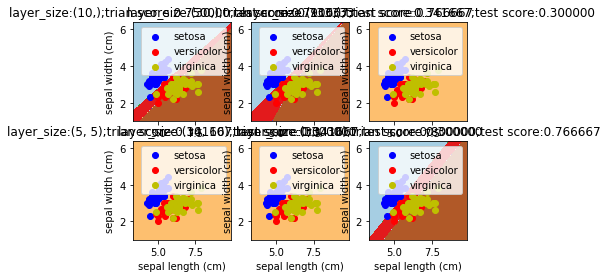

In [42]:
mlpclassifier_iris_hidden_layer_size()

然后是激活函数：

In [43]:
def mlpclassifier_iris_activations():
    fig = plt.figure()
    activations = ["logistic","tanh","relu"]
    for itx,act in enumerate(activations):
        ax = fig.add_subplot(1,3,itx+1)
        classifier = MLPClassifier(activation=act, max_iter = 10000,
                                  hidden_layer_sizes=(30,))
        classifier.fit(train_x,train_y)
        train_score = classifier.score(train_x,train_y)
        test_score = classifier.score(test_x,test_y)
        x_min, x_max = train_x[:,0].min()-1, train_x[:,0].max()+2
        y_min, y_max = train_x[:,1].min()-1, train_x[:,1].max()+2
    
        plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
        plot_samples(ax,train_x,train_y)
        ax.legend(loc = "best")
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("activation:%s;trian score:%f;test score:%f" %(act,train_score,test_score))
    plt.show()

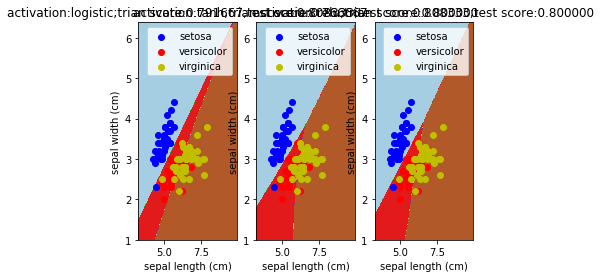

In [44]:
mlpclassifier_iris_activations()

接下来是优化算法：

In [65]:
def mlpclassifier_iris_algorithms():
    fig = plt.figure()
    solvers = ['lbfgs','sgd','adam']
    for itx,algo in enumerate(solvers):
        ax = fig.add_subplot(1,3,itx+1)
        classifier = MLPClassifier(activation="tanh", max_iter = 10000,
                                  hidden_layer_sizes=(30,),solver=algo)
        classifier.fit(train_x,train_y)
        train_score = classifier.score(train_x,train_y)
        test_score = classifier.score(test_x,test_y)
        x_min, x_max = train_x[:,0].min()-1, train_x[:,0].max()+2
        y_min, y_max = train_x[:,1].min()-1, train_x[:,1].max()+2
    
        plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
        plot_samples(ax,train_x,train_y)
        ax.legend(loc = "best")
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("solver:%s;trian score:%f;test score:%f" %(algo,train_score,test_score))
    plt.show()

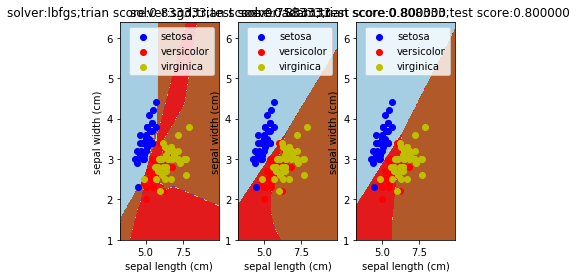

In [66]:
mlpclassifier_iris_algorithms()

In [53]:
def mlpclassifier_iris_eta():
    fig = plt.figure()
    etas = [0.1, 0.01, 0.001, 0.0001]
    for itx,eta in enumerate(etas):
        ax = fig.add_subplot(2,2,itx+1)
        classifier = MLPClassifier(activation='tanh', max_iter = 1000000,
                                  hidden_layer_sizes=(30,),algorithm = 'sgd',learning_rate_init=eta)
        classifier.fit(train_x,train_y)
        iter_num = classifier.n_iter_
        
        train_score = classifier.score(train_x,train_y)
        test_score = classifier.score(test_x,test_y)
        x_min, x_max = train_x[:,0].min()-1, train_x[:,0].max()+2
        y_min, y_max = train_x[:,1].min()-1, train_x[:,1].max()+2
    
        plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
        plot_samples(ax,train_x,train_y)
        ax.legend(loc = "best")
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("eta:%f;trian score:%f;test score:%f;iter_num:%d" %(eta,train_score,test_score,iter_num))
    plt.show()

TypeError: __init__() got an unexpected keyword argument 'algorithm'

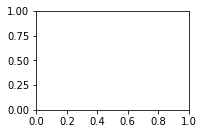

In [54]:
mlpclassifier_iris_eta()